# **Facial Emotion Detection**

## **Problem Definition**

**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What are we trying to solve using data science?



## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the Libraries**

In [ ]:
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

### **Let us load and unzip the data**

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [ ]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/Facial_emotion_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
picture_size = 48
folder_path = "Facial_emotion_images/"

## **Visualizing our Classes**

Let's look at our classes.

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

### **Happy**

**Observations and Insights:__**

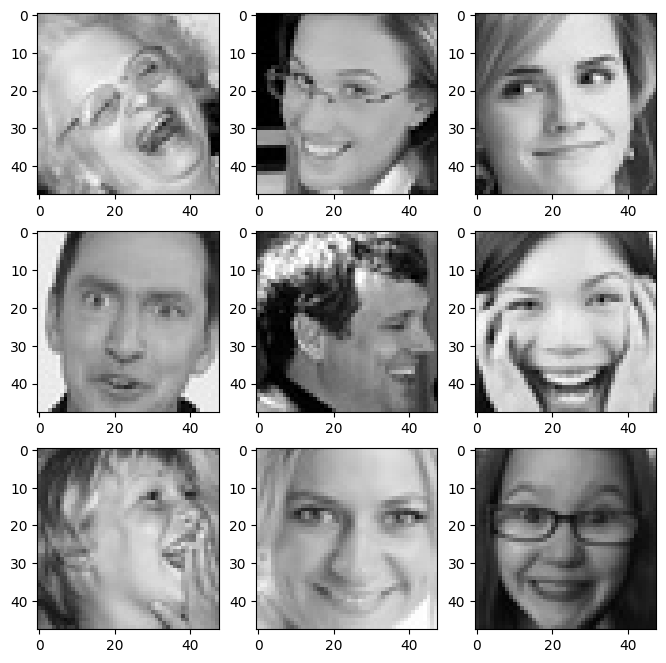

In [ ]:
expression = 'happy'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

### **Sad**

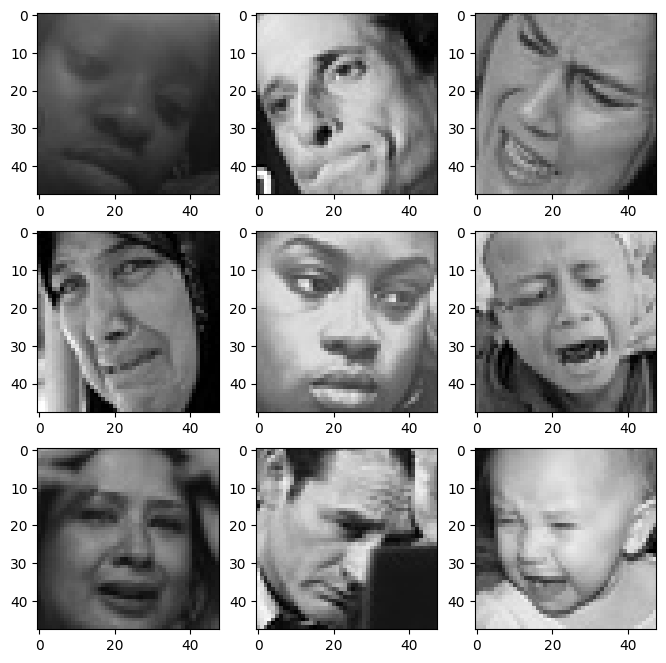

In [ ]:
expression = 'sad'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:__**

### **Neutral**

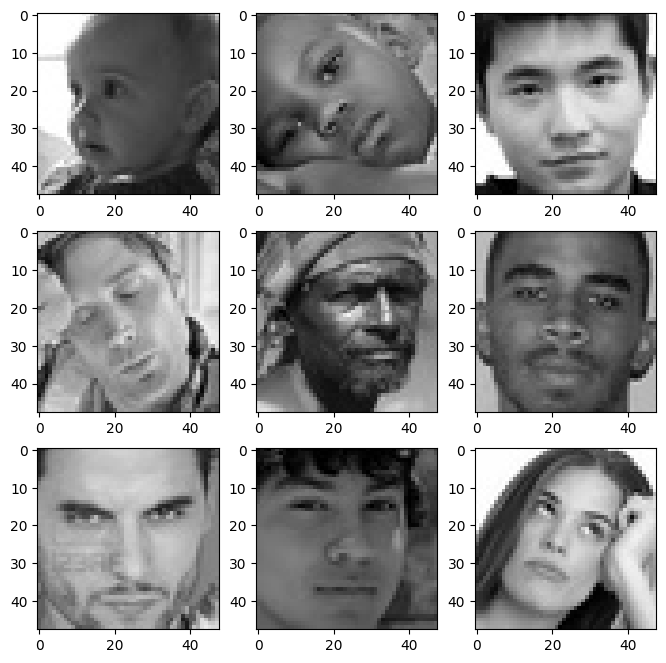

In [ ]:
expression = 'neutral'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:__**

### **Surprised**

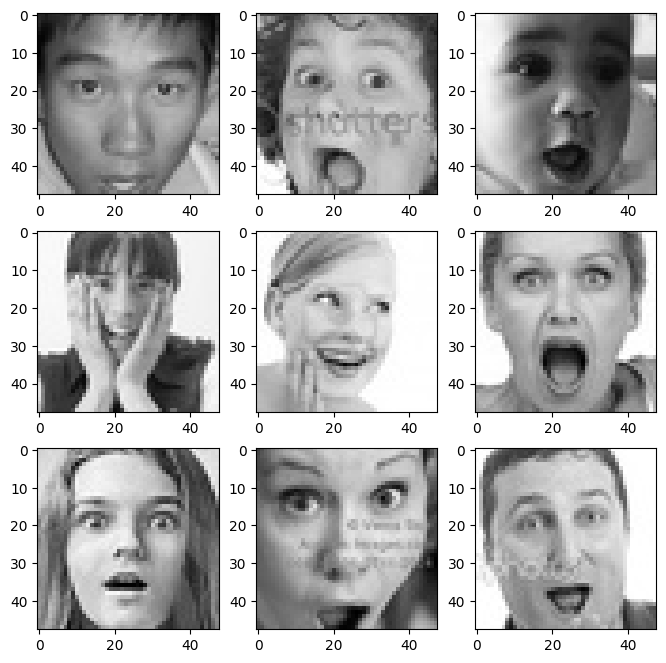

In [ ]:
expression = 'surprise'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:__**

## **Checking Distribution of Classes**

In [ ]:
# Getting count of images in each folder within our training path
num_happy = len(os.listdir(folder_path + "train/happy"))
print("Number of images in the class 'happy':   ", num_happy)

 # Write the code to get the number of training images from the class 'sad'.
num_sad = len(os.listdir(folder_path + "train/sad"))
print("Number of images in the class 'sad':   ", num_sad)


##num_neutral = # Write the code to get the number of training images from the class 'neutral'.
num_neutral = len(os.listdir(folder_path + "train/neutral"))
print("Number of images in the class 'neutral':   ", num_neutral)

#num_surprise = # Write the code to get the number of training images from the class 'surprise'.
num_surprise = len(os.listdir(folder_path + "train/surprise"))
print("Number of images in the class 'surprise':   ", num_surprise)

Number of images in the class 'happy':    3976
Number of images in the class 'sad':    3982
Number of images in the class 'neutral':    3978
Number of images in the class 'surprise':    3173


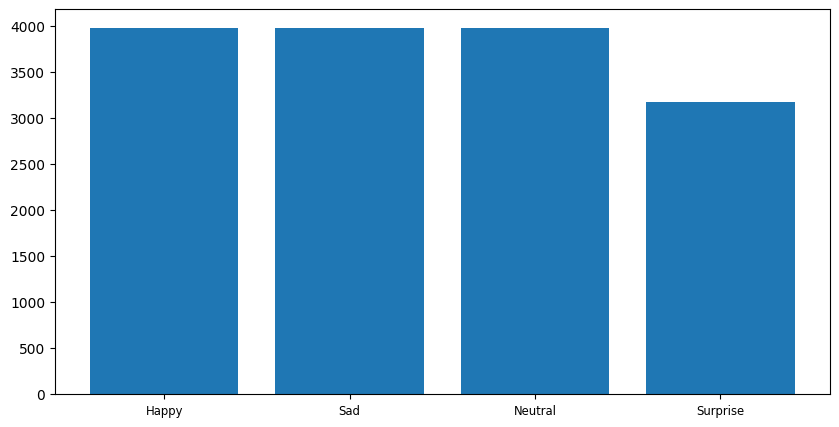

In [ ]:
# Code to plot histogram
plt.figure(figsize = (10, 5))

data = {'Happy': num_happy, 'Sad': num_sad, 'Neutral': num_neutral, 'Surprise' : num_surprise}

df = pd.Series(data)

plt.bar(range(len(df)), df.values, align = 'center')

plt.xticks(range(len(df)), df.index.values, size = 'small')

plt.show()

**Observations and Insights:__**

**Think About It:**
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?

***The classes are not equally distributed in the dataset. The number of images in each class varies, with 'surprise' having the lowest count and 'sad' having the highest count. Class imbalances can pose challenges in training machine learning models, particularly in classification tasks, where the model may become biased towards the majority class.

*** In this case, while there is some imbalance, it may not be considered too high, especially if the class distribution is not heavily skewed. However, it's still important to address class imbalances to prevent the model from being biased towards the majority class and potentially overlooking minority classes.***

***The classes are not equally distributed in the dataset. The number of images in each class varies, with 'surprise' having the lowest count and 'sad' having the highest count. Class imbalances can pose challenges in training machine learning models, particularly in classification tasks, where the model may become biased towards the majority class.

*** In this case, while there is some imbalance, it may not be considered too high, especially if the class distribution is not heavily skewed. However, it's still important to address class imbalances to prevent the model from being biased towards the majority class and potentially overlooking minority classes.***

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [ ]:
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = 32,
                                              class_mode = 'categorical',
                                              shuffle = True)

# Write your code here
datagen_validation = ImageDataGenerator(rescale=1./255)

# Write your code here
validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                                        target_size=(img_size, img_size),
                                                        color_mode='rgb',
                                                        batch_size= 32,
                                                        class_mode='categorical',
                                                        shuffle=False)

# Write your code here
datagen_test = ImageDataGenerator(rescale=1./255)


 # Write your code here
test_set = datagen_test.flow_from_directory(folder_path + "test",
                                            target_size=(img_size, img_size),
                                            color_mode='rgb',
                                            batch_size=batch_size,
                                            class_mode='categorical',
                                            shuffle=False)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **Model Building**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead?
* What are the advantages of CNNs over ANNs and are they applicable here?

### **Creating the Base Neural Network**

### For facial emotion detection tasks, Convolutional Neural Networks (CNNs) are generally the preferred approach over traditional Artificial Neural Networks (ANNs). Here's why:

### Spatial Hierarchies: CNNs are specifically designed to capture spatial hierarchies in data, making them well-suited for tasks like image classification and object detection. Facial images contain spatial features such as edges, textures, and shapes, which CNNs can effectively learn and utilize for emotion detection.

### Local Connectivity and Parameter Sharing: CNNs exploit the spatial structure of data through local connectivity and parameter sharing, allowing them to efficiently learn features from images. This makes CNNs more effective and computationally efficient than ANNs for tasks involving images, where spatial relationships between pixels are crucial.

### Feature Learning: CNNs automatically learn hierarchical representations of features from raw pixel values, eliminating the need for handcrafted feature extraction. This is advantageous for facial emotion detection, as it allows the model to learn discriminative features directly from the images, such as facial expressions, without explicit feature engineering.

### Translation Invariance: CNNs are inherently translation-invariant, meaning they can detect features regardless of their position in the input image. This property is beneficial for tasks like facial emotion detection, where the location of facial features (e.g., eyes, mouth) may vary across different images.

### Performance: CNNs have demonstrated superior performance compared to traditional ANNs on image-related tasks, including facial emotion detection. They can capture complex patterns and nuances in facial expressions, leading to more accurate predictions.

### In summary, CNNs are well-suited for facial emotion detection due to their ability to effectively learn spatial features from images, exploit local connectivity and parameter sharing, automatically learn hierarchical representations, and achieve translation invariance. While ANNs can also be used for this task, they may not perform as well as CNNs, especially when dealing with complex image data.

### For facial emotion detection tasks, Convolutional Neural Networks (CNNs) are generally the preferred approach over traditional Artificial Neural Networks (ANNs). Here's why:

### Spatial Hierarchies: CNNs are specifically designed to capture spatial hierarchies in data, making them well-suited for tasks like image classification and object detection. Facial images contain spatial features such as edges, textures, and shapes, which CNNs can effectively learn and utilize for emotion detection.

### Local Connectivity and Parameter Sharing: CNNs exploit the spatial structure of data through local connectivity and parameter sharing, allowing them to efficiently learn features from images. This makes CNNs more effective and computationally efficient than ANNs for tasks involving images, where spatial relationships between pixels are crucial.

### Feature Learning: CNNs automatically learn hierarchical representations of features from raw pixel values, eliminating the need for handcrafted feature extraction. This is advantageous for facial emotion detection, as it allows the model to learn discriminative features directly from the images, such as facial expressions, without explicit feature engineering.

### Translation Invariance: CNNs are inherently translation-invariant, meaning they can detect features regardless of their position in the input image. This property is beneficial for tasks like facial emotion detection, where the location of facial features (e.g., eyes, mouth) may vary across different images.

### Performance: CNNs have demonstrated superior performance compared to traditional ANNs on image-related tasks, including facial emotion detection. They can capture complex patterns and nuances in facial expressions, leading to more accurate predictions.

### In summary, CNNs are well-suited for facial emotion detection due to their ability to effectively learn spatial features from images, exploit local connectivity and parameter sharing, automatically learn hierarchical representations, and achieve translation invariance. While ANNs can also be used for this task, they may not perform as well as CNNs, especially when dealing with complex image data.

### **Compiling and Training the Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Define the model
model = Sequential()

# Add the first convolutional block
model.add(Conv2D(64, (2, 2), padding='same', activation='relu', input_shape=(48, 48, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Add the second convolutional block
model.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Add the third convolutional block
model.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Flatten the output
model.add(Flatten())

# Add the first dense layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))

# Add the final output layer
model.add(Dense(4, activation='softmax'))

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 32)        0

In [ ]:

# Compiling and Training the Model


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model1.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [ ]:
# Compile the model
import tensorflow as tf
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
history_model = model.fit(train_set,
                            epochs=20,
                            validation_data=validation_set)

Epoch 1/20
473/473 [==============================] - 94s 194ms/step - loss: 1.3655 - accuracy: 0.2995 - val_loss: 1.2882 - val_accuracy: 0.3944
Epoch 2/20
473/473 [==============================] - 99s 208ms/step - loss: 1.2461 - accuracy: 0.4300 - val_loss: 1.1183 - val_accuracy: 0.5254
Epoch 3/20
473/473 [==============================] - 95s 201ms/step - loss: 1.1462 - accuracy: 0.4928 - val_loss: 1.0331 - val_accuracy: 0.5726
Epoch 4/20
473/473 [==============================] - 92s 195ms/step - loss: 1.0966 - accuracy: 0.5195 - val_loss: 0.9782 - val_accuracy: 0.5923
Epoch 5/20
473/473 [==============================] - 91s 193ms/step - loss: 1.0575 - accuracy: 0.5370 - val_loss: 0.9174 - val_accuracy: 0.6150
Epoch 6/20
473/473 [==============================] - 86s 182ms/step - loss: 1.0199 - accuracy: 0.5603 - val_loss: 0.8990 - val_accuracy: 0.6313
Epoch 7/20
473/473 [==============================] - 86s 182ms/step - loss: 0.9989 - accuracy: 0.5727 - val_loss: 0.8629 - val_ac

### **Evaluating the Model on the Test Set**

In [ ]:

## To evaluate the basic neural network model on the test set, you can use the evaluate method of the model. Here's how you can do it:

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_set)

# Print the test loss and accuracy
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

4/4 [==============================] - 0s 31ms/step - loss: 0.7572 - accuracy: 0.6953
Test Loss: 0.7572280168533325
Test Accuracy: 0.6953125


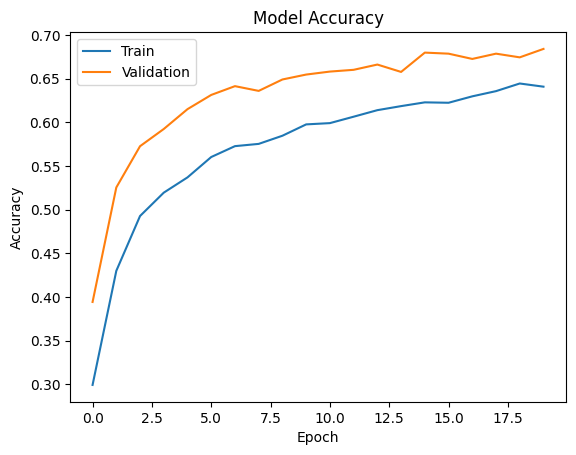

In [ ]:
plt.plot(history_model.history['accuracy'])

plt.plot(history_model.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

**Observations and Insights:__**

In [ ]:
**Observations:**
The validation accuracy is about 69.53%.
- The above plot shows that **the validation accuracy is higher than the training accuracy**. There are a **few possible reasons** for this:
    - The **size of the validation set is not big enough**.
    - We may have **imbalanced data in the validation set**.
    - **High regularization**. If we use regularization methods such as L2, L1, or Dropout, while the model calculates training accuracy it uses a regularized model but when it calculates accuracy on the validation set, it processes the data through an unregularized model. Regularization introduces some noise in loss value during training, because of this the training accuracy decreases more than expected, but while evaluating the model, the model doesn't use regularization, and hence there's no noise, which is why the validation accuracy doesn't decrease.
    - **To overcome this, we can try reducing the regularization or increasing the size of the validation set**.

### **Creating the second Convolutional Neural Network**

- Try out a slightly larger architecture

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, LeakyReLU

# Initialize the model
model2 = Sequential()

# Add first Conv2D layer
model2.add(Conv2D(256, kernel_size=(2, 2), padding='same', activation='relu', input_shape=(48, 48, 3)))

# Add BatchNormalization layer
model2.add(BatchNormalization())

# Add LeakyReLU layer
model2.add(LeakyReLU(alpha=0.1))

# Add MaxPooling2D layer
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Add second Conv2D layer
model2.add(Conv2D(128, kernel_size=(2, 2), padding='same', activation='relu'))

# Add BatchNormalization layer
model2.add(BatchNormalization())

# Add LeakyReLU layer
model2.add(LeakyReLU(alpha=0.1))

# Add MaxPooling2D layer
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Add third Conv2D layer
model2.add(Conv2D(64, kernel_size=(2, 2), padding='same', activation='relu'))

# Add BatchNormalization layer
model2.add(BatchNormalization())

# Add LeakyReLU layer
model2.add(LeakyReLU(alpha=0.1))

# Add MaxPooling2D layer
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Add fourth Conv2D layer
model2.add(Conv2D(32, kernel_size=(2, 2), padding='same', activation='relu'))

# Add Flatten layer
model2.add(Flatten())

# Add first Dense layer
model2.add(Dense(512, activation='relu'))

# Add second Dense layer
model2.add(Dense(128, activation='relu'))

# Add final Dense layer
model2.add(Dense(4, activation='softmax'))

# Print model summary
model2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 256)       3328      
                                                                 
 batch_normalization (Batch  (None, 48, 48, 256)       1024      
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 256)       0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 24, 24, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 128)       131200    
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 128)      

### **Compiling and Training the Model**

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='max')

# Define Reduce Learning Rate callback
reduce_learningrate = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, mode='max', min_lr=0.0001)

# Add the defined callbacks to the callbacks list
callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

# Define the number of epochs
epochs = 20

### **Evaluating the Model on the Test Set**

In [ ]:
# Compile the model
model2.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


In [ ]:
# Fit the model
history = model2.fit(train_set, epochs=epochs, validation_data=validation_set, callbacks=callbacks_list)

Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.2087 - accuracy: 0.4395

473/473 [==============================] - 608s 1s/step - loss: 1.2087 - accuracy: 0.4395 - val_loss: 1.2169 - val_accuracy: 0.4424 - lr: 0.0010
Epoch 2/20
473/473 [==============================] - ETA: 0s - loss: 1.0190 - accuracy: 0.5533

473/473 [==============================] - 606s 1s/step - loss: 1.0190 - accuracy: 0.5533 - val_loss: 0.9828 - val_accuracy: 0.5917 - lr: 0.0010
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 0.9413 - accuracy: 0.5934

473/473 [==============================] - 637s 1s/step - loss: 0.9413 - accuracy: 0.5934 - val_loss: 0.9232 - val_accuracy: 0.5973 - lr: 0.0010
Epoch 4/20
473/473 [==============================] - ETA: 0s - loss: 0.8776 - accuracy: 0.6224


Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
473/473 [==============================] - 594s 1s/step - loss: 0.8776 - accuracy: 0.6224 - val_loss: 0.8886 - val_accuracy: 0.6199 - lr: 0.0010
Epoch 5/20
473/473 [==============================] - ETA: 0s - loss: 0.7767 - accuracy: 0.6693

473/473 [==============================] - 640s 1s/step - loss: 0.7767 - accuracy: 0.6693 - val_loss: 0.7801 - val_accuracy: 0.6731 - lr: 2.0000e-04
Epoch 6/20
473/473 [==============================] - ETA: 0s - loss: 0.7314 - accuracy: 0.6902

473/473 [==============================] - 598s 1s/step - loss: 0.7314 - accuracy: 0.6902 - val_loss: 0.7565 - val_accuracy: 0.6936 - lr: 2.0000e-04
Epoch 6: early stopping


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model2.evaluate(test_set)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

4/4 [==============================] - 2s 573ms/step - loss: 0.7316 - accuracy: 0.6953
Test Loss: 0.7316142320632935
Test Accuracy: 0.6953125


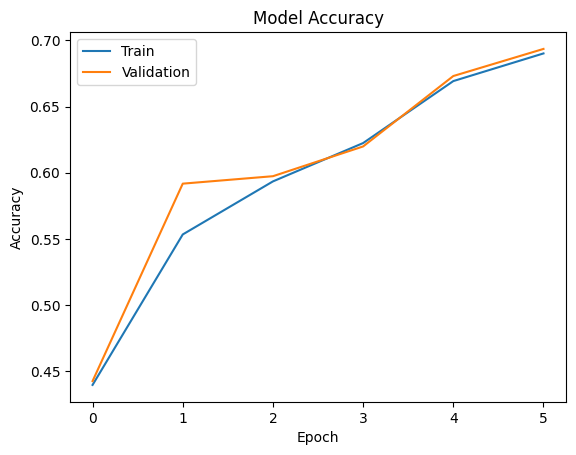

In [ ]:
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

**Observations and Insights:__**

## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

#Due to my system running out of memory, the model fit stopped at epoch =6. The validation accuracy is 69.5%. The second CNN certianly fits better improving the underfitting i.e model performance where validation accuracy was better than training set accuracy.

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

## **VGG16 Model**

In [ ]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Importing the VGG16 Architecture**

In [ ]:
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = 1./255,
                                    shear_range = 0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

 # Write your code here
validation_datagen =ImageDataGenerator(rescale=1./255)


##validation_set = # Write your code here
# Define the validation data generator without data augmentation

# Define the validation data generator
validation_generator = validation_datagen.flow_from_directory(
    'validation_dir_path',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False
)

validation_set = base_model.predict(validation_generator)

# Write your code here
datagen_test = ImageDataGenerator(rescale=1./255)
test_set = datagen_test.flow_from_directory(test_dir,
                                            target_size=(48,48),
                                            batch_size=batch_size,
                                            class_mode='categorical',
                                            shuffle=False)

# Write your code here
test_set = datagen_test.flow_from_directory(test_dir,
                                            target_size=(48, 48),
                                            batch_size=batch_size,
                                            class_mode='categorical',
                                            shuffle=False)

Found 15109 images belonging to 4 classes.


FileNotFoundError: [Errno 2] No such file or directory: 'validation_dir_path'

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (48, 48, 3))
vgg.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                              

In [ ]:
# Checking summary of the model
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.

The VGG16 model has more than 14.7 M trainable parameters.
Here, we will not train any of the layers from the VGG16 model. We will use the pre-trained weights and biases.
Also, we can take any layer's output from the VGG16 model as the input of our new model. Here, we will take the output of the 3rd block of the VGG16 model as the input of our new model.

In [ ]:
transfer_layer = vgg.get_layer('block3_pool')

In [ ]:
vgg.trainable = False

Now, we will add classification layers to our model using Functional Model API.

In [ ]:
# Compiling the model
model_vgg.compile(loss = 'categorical_crossentropy',

              optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.0005),

              metrics = ['accuracy'])

In [ ]:
# Add classification layers on top of it
x = Flatten()(transfer_layer.output)

x = Dense(256, activation = 'relu')(x)

x = Dense(128, activation = 'relu')(x)

x = Dropout(0.3)(x)

x = Dense(64, activation = 'relu')(x)

x = BatchNormalization()(x)

pred = Dense(4, activation = 'softmax')(x)

# Initializing the model
model_vgg = Model(vgg.input, pred)

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

# Load the VGG16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48,48, 3))

# Freeze the convolutional base
base_model.trainable = False

# Add fully connected layers
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
output = Dense(4, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0   

### **Compiling and Training the VGG16 Model**

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Define callbacks
checkpoint = ModelCheckpoint("vgg16_model.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, mode='min', min_lr=1e-6)

callbacks = [checkpoint, early_stopping, reduce_lr]

# Train the model
history = model.fit(
    train_set,
    epochs=epochs,
    validation_data=validation_set,
    callbacks=callbacks
)


Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.2253 - accuracy: 0.4317
Epoch 1: val_loss improved from inf to 1.24487, saving model to vgg16_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


473/473 [==============================] - 590s 1s/step - loss: 1.2253 - accuracy: 0.4317 - val_loss: 1.2449 - val_accuracy: 0.4171 - lr: 0.0010
Epoch 2/20
473/473 [==============================] - ETA: 0s - loss: 1.1633 - accuracy: 0.4710
Epoch 2: val_loss did not improve from 1.24487
473/473 [==============================] - 565s 1s/step - loss: 1.1633 - accuracy: 0.4710 - val_loss: 1.2466 - val_accuracy: 0.4402 - lr: 0.0010
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 1.1455 - accuracy: 0.4861
Epoch 3: val_loss improved from 1.24487 to 1.22647, saving model to vgg16_model.h5
473/473 [==============================] - 567s 1s/step - loss: 1.1455 - accuracy: 0.4861 - val_loss: 1.2265 - val_accuracy: 0.4262 - lr: 0.0010
Epoch 4/20
473/473 [==============================] - ETA: 0s - loss: 1.1255 - accuracy: 0.4909
Epoch 4: val_loss did not improve from 1.22647
473/473 [==============================] - 567s 1s/step - loss: 1.1255 - accuracy: 0.4909 - val_loss

### **Evaluating the VGG16 model**

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_set)

# Print the test loss and accuracy
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

4/4 [==============================] - 3s 788ms/step - loss: 1.2407 - accuracy: 0.3828
Test Loss: 1.2406606674194336
Test Accuracy: 0.3828125


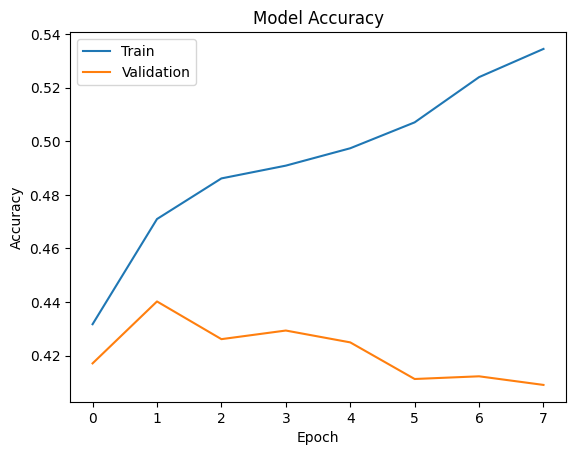

In [ ]:
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

**Think About It:**

- What do you infer from the general trend in the training performance?
- Is the training accuracy consistently improving?
- Is the validation accuracy also improving similarly?

**Observations and Insights:__**

**Note: The pretrained model doesn't seem to perform better than CNN model. This can be due to imbalanced data set. We can improve this model by tuning the hyperparameters**

## **ResNet V2 Model**

In [ ]:
from tensorflow.keras.applications import ResNet50V2

# Load the ResNet50V2 model without the top (classification) layer
resnet_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(48,48, 3))

# Freeze the layers in the base model
for layer in resnet_model.layers:
    layer.trainable = False

# Add your custom top layers on top of the ResNet50V2 base model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Create a new Sequential model
model_rest = Sequential()

# Add the ResNet50V2 base model
model_rest.add(resnet_model)

# Add your custom top layers
model_rest.add(Flatten())
model_rest.add(Dense(256, activation='relu'))
model_rest.add(Dense(4, activation='softmax'))  # Assuming you have 4 output classes

# Compile the model
model_rest.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model_rest.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2, 2, 2048)        23564800  
                                                                 
 flatten_10 (Flatten)        (None, 8192)              0         
                                                                 
 dense_29 (Dense)            (None, 256)               2097408   
                                                                 
 dense_30 (Dense)            (None, 4)                 1028      
                                                                 
Total params: 25663236 (97.90 MB)
Trainable params: 2098436 (8.00 MB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

# Load the ResNet50V2 model without the top (classification) layer
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add your custom top layers on top of the ResNet50V2 base model
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
output = Dense(4, activation='softmax')(x)  # num_classes is the number of output classes

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_9[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                            

### **Compiling and Training the Model**

In [ ]:
# Compile the model
model_rest.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_rest = model_rest.fit(train_set, validation_data=validation_set, epochs=5, callbacks=callbacks_list)



Epoch 1/5
473/473 [==============================] - ETA: 0s - loss: 1.3154 - accuracy: 0.4493

473/473 [==============================] - 271s 455ms/step - loss: 1.3154 - accuracy: 0.4493 - val_loss: 1.2309 - val_accuracy: 0.4280 - lr: 0.0010
Epoch 2/5
473/473 [==============================] - ETA: 0s - loss: 1.1288 - accuracy: 0.5061

473/473 [==============================] - 249s 526ms/step - loss: 1.1288 - accuracy: 0.5061 - val_loss: 1.2633 - val_accuracy: 0.4354 - lr: 0.0010
Epoch 3/5
473/473 [==============================] - ETA: 0s - loss: 1.0913 - accuracy: 0.5247

473/473 [==============================] - 251s 531ms/step - loss: 1.0913 - accuracy: 0.5247 - val_loss: 1.2839 - val_accuracy: 0.4129 - lr: 0.0010
Epoch 4/5
473/473 [==============================] - ETA: 0s - loss: 1.0538 - accuracy: 0.5417

473/473 [==============================] - 251s 531ms/step - loss: 1.0538 - accuracy: 0.5417 - val_loss: 1.2859 - val_accuracy: 0.4067 - lr: 0.0010
Epoch 5/5
473/473 [==============================] - ETA: 0s - loss: 1.0321 - accuracy: 0.5527

473/473 [==============================] - 215s 454ms/step - loss: 1.0321 - accuracy: 0.5527 - val_loss: 1.2064 - val_accuracy: 0.4573 - lr: 0.0010


InvalidArgumentError: Graph execution error:

Detected at node model_6/dense_31/Relu defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-84-397c2617edb1>", line 8, in <cell line: 8>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2296, in evaluate

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 4108, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1917, in test_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 590, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 515, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py", line 255, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/activations.py", line 306, in relu

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5395, in relu

Matrix size-incompatible: In[0]: [32,8192], In[1]: [100352,256]
	 [[{{node model_6/dense_31/Relu}}]] [Op:__inference_test_function_159143]

### **Evaluating the ResNet Model**

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_rest.evaluate(test_set)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


4/4 [==============================] - 2s 493ms/step - loss: 1.0779 - accuracy: 0.5625
Test Loss: 1.0778506994247437
Test Accuracy: 0.5625


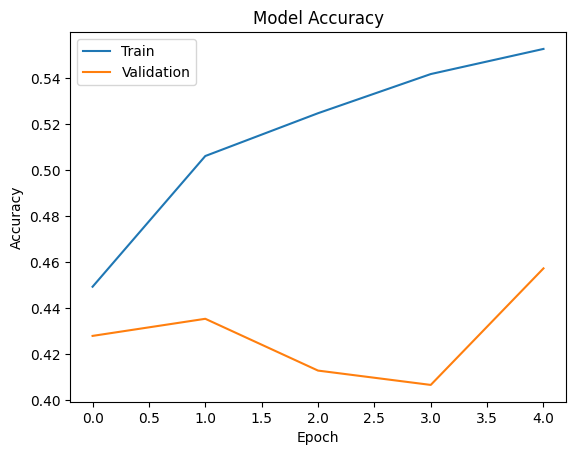

In [ ]:
plt.plot(history_rest.history['accuracy'])

plt.plot(history_rest.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

There is wide gap between the training and validation accuracy of the model resulting in overfitting. This model doesn't seem to provide the good performance. It can be further fine tuned with larger number epochs. Additionally, the validation accuracy % is 54%.

**Observations and Insights:__**

**Note: You can even go back and build your own architecture on top of the ResNet Transfer layer and see if you can improve the performance.**

## **EfficientNet Model**

In [ ]:
pip install efficientnet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.1 MB/s eta 0:00:00


In [ ]:
import efficientnet.keras as efn
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D


### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
base_model = efn.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))


16804768/16804768 [==============================] - 0s 0us/step


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)
model_eff = Model(inputs=base_model.input, outputs=predictions)


### **Compiling and Training the Model**

In [ ]:
model_eff.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history_eff = model_eff.fit(train_set, epochs=10, validation_data=validation_set, callbacks=callbacks_list)


Epoch 1/10
473/473 [==============================] - ETA: 0s - loss: 1.0736 - accuracy: 0.5395

473/473 [==============================] - 347s 656ms/step - loss: 1.0736 - accuracy: 0.5395 - val_loss: 0.9964 - val_accuracy: 0.5069 - lr: 0.0010
Epoch 2/10
473/473 [==============================] - ETA: 0s - loss: 0.8320 - accuracy: 0.6533

473/473 [==============================] - 304s 642ms/step - loss: 0.8320 - accuracy: 0.6533 - val_loss: 1.0908 - val_accuracy: 0.5266 - lr: 0.0010
Epoch 3/10
473/473 [==============================] - ETA: 0s - loss: 0.7567 - accuracy: 0.6878

473/473 [==============================] - 322s 682ms/step - loss: 0.7567 - accuracy: 0.6878 - val_loss: 1.1331 - val_accuracy: 0.5459 - lr: 0.0010
Epoch 4/10
473/473 [==============================] - ETA: 0s - loss: 0.7043 - accuracy: 0.7161

473/473 [==============================] - 306s 647ms/step - loss: 0.7043 - accuracy: 0.7161 - val_loss: 1.1594 - val_accuracy: 0.5638 - lr: 0.0010
Epoch 5/10
473/473 [==============================] - ETA: 0s - loss: 0.6837 - accuracy: 0.7247

473/473 [==============================] - 304s 642ms/step - loss: 0.6837 - accuracy: 0.7247 - val_loss: 1.0292 - val_accuracy: 0.5276 - lr: 0.0010
Epoch 6/10
473/473 [==============================] - ETA: 0s - loss: 0.6400 - accuracy: 0.7416

473/473 [==============================] - 304s 643ms/step - loss: 0.6400 - accuracy: 0.7416 - val_loss: 1.0020 - val_accuracy: 0.5258 - lr: 0.0010
Epoch 7/10
473/473 [==============================] - ETA: 0s - loss: 0.6073 - accuracy: 0.7539


Epoch 7: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
473/473 [==============================] - 303s 641ms/step - loss: 0.6073 - accuracy: 0.7539 - val_loss: 1.1473 - val_accuracy: 0.5333 - lr: 0.0010
Epoch 8/10
473/473 [==============================] - ETA: 0s - loss: 0.5044 - accuracy: 0.7971

473/473 [==============================] - 322s 680ms/step - loss: 0.5044 - accuracy: 0.7971 - val_loss: 1.2431 - val_accuracy: 0.5445 - lr: 2.0000e-04
Epoch 9/10
473/473 [==============================] - ETA: 0s - loss: 0.4615 - accuracy: 0.8187

473/473 [==============================] - 305s 646ms/step - loss: 0.4615 - accuracy: 0.8187 - val_loss: 1.2517 - val_accuracy: 0.5369 - lr: 2.0000e-04
Epoch 10/10
473/473 [==============================] - ETA: 0s - loss: 0.4265 - accuracy: 0.8339

473/473 [==============================] - 301s 637ms/step - loss: 0.4265 - accuracy: 0.8339 - val_loss: 1.3562 - val_accuracy: 0.5445 - lr: 2.0000e-04


### **Evaluating the EfficientnetNet Model**

In [ ]:
test_loss, test_accuracy = model_eff.evaluate(test_set)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

4/4 [==============================] - 0s 108ms/step - loss: 1.3196 - accuracy: 0.5156
Test Loss: 1.3196295499801636
Test Accuracy: 0.515625


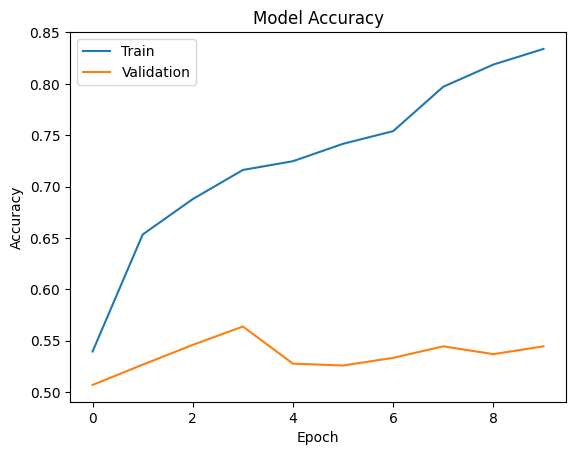

In [ ]:
plt.plot(history_eff.history['accuracy'])

plt.plot(history_eff.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

**Observations and Insights:__**
The EfficientNet Model doesn't seem to provide satisfactory performance. It seems to be overfitting.

**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?
* Do you think our issue lies with 'rgb' color_mode?

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.

In [ ]:
batch_size = 32
img_size = 48


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory(
    'train_directory_path',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical'
)

validation_set = validation_datagen.flow_from_directory(
    'validation_directory_path',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    'test_directory_path',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical'
)


FileNotFoundError: [Errno 2] No such file or directory: 'train_directory_path'

In [ ]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
model_complex = Sequential()

model_complex.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model_complex.add(MaxPooling2D(pool_size=(2, 2)))

model_complex.add(Conv2D(64, (3, 3), activation='relu'))
model_complex.add(MaxPooling2D(pool_size=(2, 2)))

model_complex.add(Conv2D(128, (3, 3), activation='relu'))
model_complex.add(MaxPooling2D(pool_size=(2, 2)))

model_complex.add(Flatten())
model_complex.add(Dense(512, activation='relu'))
model_complex.add(Dropout(0.5))
model_complex.add(Dense(4, activation='softmax'))

model_complex.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


### **Compiling and Training the Model**

In [ ]:
history_complex = model_complex.fit( train_set, steps_per_epoch=train_set.samples // batch_size, epochs=10, validation_data=validation_set,validation_steps=validation_set.samples // batch_size
)


Epoch 1/10


UnimplementedError: Graph execution error:

Detected at node sequential_1/conv2d_3/Relu defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-114-e30b28d64238>", line 1, in <cell line: 1>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 590, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/sequential.py", line 398, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 515, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py", line 321, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/activations.py", line 306, in relu

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5395, in relu

Fused conv implementation does not support grouped convolutions for now.
	 [[{{node sequential_1/conv2d_3/Relu}}]] [Op:__inference_train_function_246737]

### **Evaluating the Model on Test Set**

In [ ]:
test_loss, test_accuracy = model.evaluate(test_set)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [ ]:
plt.plot(history_complex.history['accuracy'])

plt.plot(history_complex.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

**Observations and Insights:__**

**Observations:**

- The model **training accuracy for Second CNN model is slightly higher than the validation accuracy for other models experimented until now**.
- The **validation accuracy has improved in comparison to the previous model**.
- We have been able to achieve the **best validation accuracy so far .** There are other pre-trained models which can be tried and/or tuned to get better performance.

Here, let's use the this model to make predictions on the test data.

### **Plotting the Confusion Matrix for the chosen final model**

In [ ]:
predictions = model2.predict(test_set)


4/4 [==============================] - 1s 256ms/step


In [ ]:
# Importing required functions
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

In [ ]:
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_set.classes
class_names = list(test_set.class_indices.keys())


In [ ]:
confusion_mtx = confusion_matrix(true_classes, predicted_classes)


In [ ]:
# Making predictions on the test data
y_pred_test = model2.predict(test_set)

# Converting probabilities to class labels
y_pred_test_classes = np.argmax(y_pred_test, axis = 1)

# Calculating the probability of the predicted class
y_pred_test_max_probas = np.max(y_pred_test, axis = 1)

4/4 [==============================] - 2s 406ms/step


              precision    recall  f1-score   support

           0       0.71      0.75      0.73        32
           1       0.65      0.69      0.67        32
           2       0.53      0.56      0.55        32
           3       0.96      0.78      0.86        32

    accuracy                           0.70       128
   macro avg       0.71      0.70      0.70       128
weighted avg       0.71      0.70      0.70       128



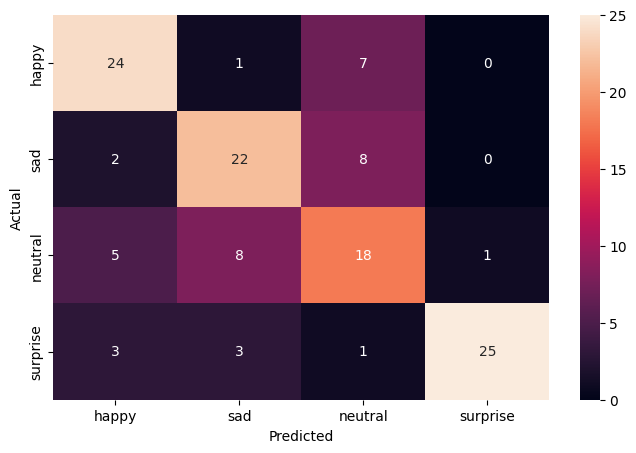

In [ ]:
# Importing required functions
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

y_true = test_set.classes

# Printing the classification report
print(classification_report(y_true, y_pred_test_classes))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, y_pred_test_classes)

plt.figure(figsize = (8, 5))


num_classes = ['happy', 'sad', 'neutral', 'surprise']

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = num_classes, yticklabels = num_classes)

plt.ylabel('Actual')

plt.xlabel('Predicted')

# Display the plot
plt.show()

**Observations:**

- The model is giving about **70% accuracy on the test data** which is **comparable to the accuracy of the validation data.** This implies that the model is giving a generalized performance.
- The **recall has a high range** which implies that the **model is good at identifying some objects while poor at identifying some other objects**

**Observations and Insights:__**

## **Conclusion:**

**Executive Summary** : Facial Image Detection for Emotion Recognition

Facial image detection for emotion recognition is a cutting-edge technology that leverages Neural Network algorithms such as ANN, CNN, Transfer Learning to analyze human facial expressions and classify them into different emotional states, such as happy, neutral, sad, and surprise. This innovative technology holds significant promise across various industries, including healthcare, marketing, education, and entertainment.

**Challenges**:

Cultural and individual differences: Emotion recognition algorithms may struggle to accurately interpret facial expressions due to cultural variations, individual differences, and contextual factors.
Privacy and ethics: Concerns arise regarding the ethical use of facial data, privacy implications, and potential misuse of emotion recognition technology for surveillance or manipulation.
Bias and fairness: Emotion recognition systems may exhibit biases based on factors such as race, gender, and age, leading to inaccuracies and unfair treatment, particularly in sensitive applications such as healthcare and law enforcement.

**Benefits**:

Enhanced emotional understanding: Facial image detection facilitates the accurate identification and interpretation of human emotions, leading to better communication, empathy, and emotional intelligence.
Personalized experiences: Emotion recognition enables personalized recommendations, content, and interactions tailored to individual emotional states, preferences, and needs.
Improved mental health care: By analyzing facial expressions, emotion recognition systems can assist mental health professionals in diagnosing mood disorders, assessing treatment effectiveness, and providing timely interventions.
Engaging user experiences: In entertainment and gaming, emotion recognition technology enhances immersion and engagement by enabling dynamic interactions and responses based on user emotions.

This executive summary provides a comprehensive overview of facial image detection for emotion recognition, highlighting its applications, benefits, challenges across diverse industries and societal contexts

**Future Outlook**:
Facial image detection technology is poised for continued growth and innovation, with potential applications in diverse fields such as security, healthcare, retail, and entertainment. However, addressing privacy concerns, mitigating biases, and ensuring ethical standards will be crucial for fostering trust and responsible deployment of this powerful technology.

**____Recommend for Implementation______**

**Data Collection and Annotation**:

Gather a diverse dataset of facial images encompassing various demographics, expressions, and environmental conditions.
Annotate the dataset with ground truth labels indicating the corresponding emotional states (happy, neutral, sad, surprise) to train and validate the emotion recognition model effectively.

**Preprocessing and Feature Extraction**:

Preprocess facial images to enhance quality, remove noise, and standardize illumination and pose for better model performance.
Extract relevant features from facial images, such as facial landmarks, texture patterns, and color histograms, to capture distinctive cues associated with different emotional expressions.

**Model Selection and Training**:

Choose appropriate machine learning or deep learning models tailored for facial image analysis and emotion recognition tasks, such as convolutional neural networks (CNNs) or recurrent neural networks (RNNs).
Train the selected model using the annotated dataset, employing techniques like data augmentation, transfer learning, and fine-tuning to improve generalization and robustness across diverse emotional expressions.
Evaluation and Validation:

Evaluate the trained model's performance using appropriate metrics (e.g., accuracy, precision, recall, F1-score) on a separate validation dataset to assess its ability to accurately recognize happy, neutral, sad, and surprise emotions.
Conduct cross-validation and sensitivity analysis to identify potential biases, limitations, and areas for improvement in the emotion recognition system.

**User Interface and Integration**:

Develop a user-friendly interface for capturing and processing facial images in real-time or from static sources (e.g., images, videos, webcam streams).
Integrate the emotion recognition system seamlessly into existing applications, platforms, or devices (e.g., healthcare apps, customer service chatbots, virtual reality simulations) to enhance user experiences and interactions.
Privacy and Ethical Considerations:

Implement privacy-preserving measures to safeguard sensitive facial data, such as anonymization, encryption, and access controls, in compliance with relevant regulations (e.g., GDPR, HIPAA).

Adhere to ethical guidelines and principles (e.g., informed consent, transparency, fairness) in the collection, storage, and use of facial images for emotion recognition purposes, prioritizing user autonomy and welfare.

**Continuous Monitoring and Improvement**:

Continuously monitor and evaluate the deployed emotion recognition system's performance and user feedback to identify potential issues, biases, or emerging challenges.
Incorporate feedback-driven updates, model retraining, and algorithmic refinements to enhance accuracy, adaptability, and inclusivity over time.

**By following these recommendations, organizations can effectively implement facial image detection for emotion recognition, enabling diverse applications across industries while ensuring privacy, fairness, and ethical integrity**.

**Solution Summary :**

### **Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?

**I'm proposing Second CNN as the best model so far to make predictions in comparison to ANN, CNN, second CNN, Transfer Learning models such as VGG16 model, ResNet Model, EfficientNet etc. As we increase the epoch and computational memory, probably might improve the accuracy.There are other pre-trained models which can be tried and/or tuned to get better performance**

In [2]:
print ("My name is Shivam and my years of experience in Python are", 5,"years")

My name is Shivam and my years of experience in Python are 5 years
